<a href="https://colab.research.google.com/github/Mo7amed-Fawzi/Application-desktop-Design-hydraulik-of-fish-tank-/blob/main/HandSpecimensGabbro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

import cv2

import tensorflow as tf
from tensorflow import keras
import datetime, os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

import numpy as np
import pandas as pd
import glob as gb


from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input



from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout

from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
HandSpecimensGabbro="../content/drive/MyDrive/Hand Specimens Gabbro"

In [ ]:
dir_list = os.listdir(HandSpecimensGabbro)
print("Files and directories in '", HandSpecimensGabbro, "' :") 
  
# print the list
print(dir_list)

Files and directories in ' ../content/drive/MyDrive/Hand Specimens Gabbro ' :
['white gabbro in dunite or wherlite', 'Troctolite', 'Semi-Massive iron ore in gabbro', 'Pyroxene Hornblende Gabbro', 'Metagabbro', 'Olivine Gabbro', 'norite', 'Massive Iron Oxide in gabbro', 'Quartz gabbro', 'Layered Gabbro', 'Hornblendite', 'Gabbro', 'Disseminated Ore (ilmenite) in gabbro', 'Anorthosite', 'Hornblende Gabbro', 'Hornblende Gabbro with iron oxide', 'Essexite', 'Pyroxene Gabbro']


In [ ]:
size = []
for folder in  os.listdir(HandSpecimensGabbro +'') : 
    files = gb.glob(pathname= str( HandSpecimensGabbro +'//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

In [ ]:
code = {'white gabbro in dunite or wherlite':0 ,'Troctolite':1,'Metagabbro':2,'Olivine Gabbro':3,'norite':4,'Layered Gabbro':5,'Gabbro':6,'Anorthosite':7 ,'Essexite':8,'Pyroxene Gabbro':9,'Semi-Massive iron ore in gabbro':10,'Hornblende Gabbro with iron oxide':11,'Hornblende Gabbro':12,'Disseminated Ore (ilmenite) in gabbro':13,'Hornblendite':14,'Quartz gabbro':15,'Massive Iron Oxide in gabbro':16,'Pyroxene Hornblende Gabbro':17}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x   

In [ ]:
X_data = []
y_data = []
size = []
s=460

for folder in  os.listdir(HandSpecimensGabbro +'') :

    files = gb.glob(pathname= str( HandSpecimensGabbro +'//' + folder + '/*.jpg'))
    print(f'For All data , found {len(files)} in folder {folder}')

    for file in files: 
      
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_data.append(list(image))
        y_data.append(code[folder])
        size.append(image_array.shape)

pd.Series(size).value_counts()


For All data , found 3 in folder white gabbro in dunite or wherlite
For All data , found 14 in folder Troctolite
For All data , found 8 in folder Metagabbro
For All data , found 2 in folder Olivine Gabbro
For All data , found 94 in folder norite
For All data , found 10 in folder Layered Gabbro
For All data , found 131 in folder Gabbro
For All data , found 182 in folder Anorthosite
For All data , found 5 in folder Essexite
For All data , found 16 in folder Pyroxene Gabbro
For All data , found 18 in folder Semi-Massive iron ore in gabbro
For All data , found 13 in folder Hornblende Gabbro with iron oxide
For All data , found 10 in folder Hornblende Gabbro
For All data , found 39 in folder Disseminated Ore (ilmenite) in gabbro
For All data , found 18 in folder Hornblendite
For All data , found 3 in folder Quartz gabbro
For All data , found 18 in folder Massive Iron Oxide in gabbro
For All data , found 8 in folder Pyroxene Hornblende Gabbro


(460, 460, 3)    592
dtype: int64

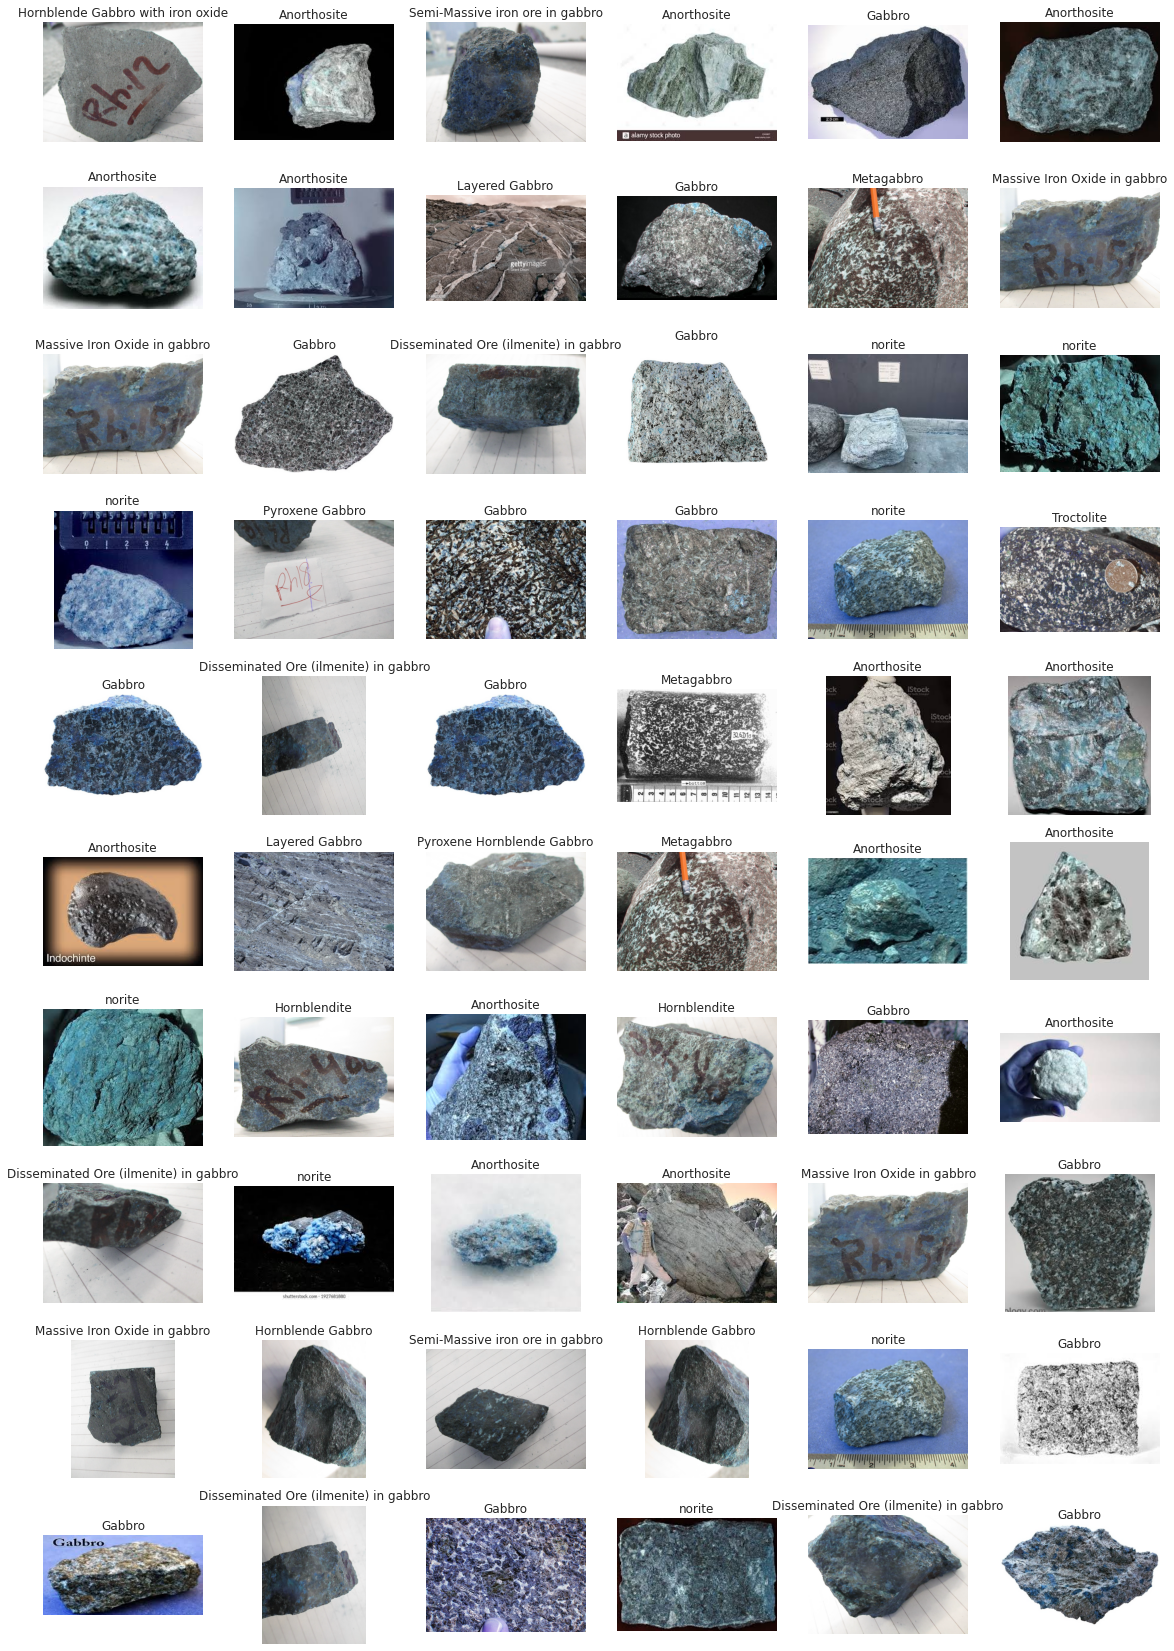

In [ ]:
plt.figure(figsize=(20,30))
for n , i in enumerate(list(np.random.randint(0,len(X_data),60))) : 
    plt.subplot(10,6,n+1)
    plt.imshow(X_data[i])    
    plt.axis('off')
    plt.title(getcode(y_data[i]))

In [ ]:
print(f'we have {len(X_train)} items in X_train')